In [202]:
import numpy as np
import pandas as pd
import numpy as np
import gensim
import sklearn
import spacy
import seaborn as sns
from spacy import displacy
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel, LsiModel, HdpModel
from matplotlib import pyplot as plt
%matplotlib inline

In [340]:
arxiv_data = pd.read_csv('../data/processed/arxiv_dataset.csv').drop("Unnamed: 0", axis=1)
def grab_date(updated, created):
    if updated is None and created is None:
        return 
    if updated is None:
        return created 
    if created is None:
        return updated
    return max(created, updated)
    
arxiv_data['updated'] = pd.to_datetime(arxiv_data.updated)
arxiv_data['created'] = pd.to_datetime(arxiv_data.created)
arxiv_data['date'] = arxiv_data.apply(lambda x: grab_date(x['updated'], x['created']), axis=1)

In [341]:
arxiv_data['abstract']

0       wireless ad hoc networks are seldom characteri...
1       this paper discovers fundamental principles of...
2       the low latency fault tolerance (llft) system ...
3       motivated by kleinberg's (2000) and subsequent...
4       a self-stabilizing simulation of a single-writ...
                              ...                        
9149    although cloud computing has been transformati...
9150    mpj express is a messaging system that allows ...
9151    the bulk-synchronous parallel model of computa...
9152    distributed hash tables (dhts) have been used ...
9153    in this paper we study the problem of how resi...
Name: abstract, Length: 9154, dtype: object

### Cleaning the Data 

In [342]:
nlp = spacy.load('en_core_web_sm')
stop_words = ['say', '\s', 'mr', 'Mr', 'said', 'says', 'saying', 'today', 'be']
for stopword in stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

<>:2: DeprecationWarning: invalid escape sequence '\s'
<>:2: DeprecationWarning: invalid escape sequence '\s'
/var/folders/td/x8g_cy716gz_hg0jqf16sm000000gn/T/ipykernel_2589/3513328973.py:2: DeprecationWarning: invalid escape sequence '\s'
  stop_words = ['say', '\s', 'mr', 'Mr', 'said', 'says', 'saying', 'today', 'be']
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is dep

/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POIN

/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POIN

In [344]:
def clean_the_data(document):
    document = document.split()
    new_document = []
    for word in document : 
        if word != '\n' and not nlp.vocab[word].is_stop and not nlp.vocab[word].is_punct and not nlp.vocab[word].like_num and word.lower() not in ['i', 'we']: 
            new_document.append(word)
    return new_document

In [345]:
texts = arxiv_data['title'].apply(clean_the_data).to_list()

In [346]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [347]:
lda_model = LdaModel(corpus=corpus, num_topics=13, id2word=dictionary, per_word_topics=2)
lda_model.show_topics(num_topics=100)

[(0,
  '0.020*"energy" + 0.013*"based" + 0.012*"methods" + 0.011*"multicore" + 0.011*"computing" + 0.010*"smart" + 0.010*"algorithms" + 0.010*"hpc" + 0.010*"heterogeneous" + 0.010*"high-performance"'),
 (1,
  '0.039*"analysis" + 0.038*"data" + 0.022*"performance" + 0.021*"big" + 0.019*"framework" + 0.011*"research" + 0.010*"parallel" + 0.010*"intel" + 0.009*"access" + 0.008*"throughput"'),
 (2,
  '0.042*"memory" + 0.017*"efficient" + 0.011*"clouds" + 0.010*"reduction" + 0.010*"management" + 0.010*"dynamic" + 0.010*"transactional" + 0.009*"learning" + 0.009*"power" + 0.009*"classification"'),
 (3,
  '0.019*"learning" + 0.016*"gpus" + 0.014*"case" + 0.014*"study" + 0.013*"model" + 0.011*"performance" + 0.011*"grid" + 0.011*"dynamics" + 0.010*"federated" + 0.010*"logic"'),
 (4,
  '0.042*"cloud" + 0.035*"computing" + 0.023*"data" + 0.018*"distributed" + 0.016*"systems" + 0.015*"performance" + 0.014*"network" + 0.011*"model" + 0.011*"resource" + 0.011*"virtual"'),
 (5,
  '0.029*"parallel" +

In [348]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [349]:
pyLDAvis.enable_notebook()
gensimvis.prepare(lda_model, corpus, dictionary)

/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.139853 -0.045170       1        1  11.965237
7     -0.020047  0.016566       2        1  10.528600
5     -0.078014 -0.000587       3        1   9.597184
0      0.018450  0.089012       4        1   7.828052
6      0.010522  0.044031       5        1   7.547680
8     -0.042200 -0.034517       6        1   7.134838
1      0.117133 -0.181454       7        1   7.015056
11    -0.089123  0.020696       8        1   6.936027
10     0.047502  0.067800       9        1   6.468219
12    -0.075010  0.001666      10        1   6.441835
9     -0.164104 -0.082569      11        1   6.291378
3      0.056119 -0.054618      12        1   6.233923
2      0.078919  0.159146      13        1   6.011970, topic_info=             Term         Freq        Total Category  logprob  loglift
27         memory   278.000000   278.000000  Default  30.0000  30.0000
4        networks   637.000000   637.000000  Default  29.0000  29.0000
94          cloud   515.000000   515.000000  Default  28.0000  28.0000
289      analysis   415.000000   415.000000  Default  27.0000  27.0000
48    distributed  1117.000000  1117.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
472        shared    20.699310    67.468743  Topic13  -5.2183   1.6299
235      adaptive    21.343072   131.117354  Topic13  -5.1876   0.9961
79   architecture    22.576831   244.444669  Topic13  -5.1314   0.4294
679       virtual    20.909489   122.982025  Topic13  -5.2082   1.0396
158        hybrid    18.482209   109.896699  Topic13  -5.3315   1.0287

[871 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
2173      8  0.039117     (extended
2173      9  0.938806     (extended
3624      1  0.919799             +
2748      7  0.909225      abstract
2214      2  0.878003  abstractions
...     ...       ...           ...
859       8  0.084361      workload
859       9  0.703006      workload
859      13  0.196842      workload
2856      5  0.892105    worst-case
1832      7  0.938917          xeon

[2285 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 6, 1, 7, 9, 2, 12, 11, 13, 10, 4, 3])

In [350]:
topics = lda_model.get_document_topics(corpus)

In [351]:
paper_topic_assignment = [sorted(doc_topics, key=lambda x: x[1], reverse=True)[0] for doc_topics in topics]

In [352]:
arxiv_data['Topic'] = list(map(lambda x: x[0], paper_topic_assignment))
arxiv_data['Topic_Prob'] = list(map(lambda x: x[1], paper_topic_assignment))

### Co-Authorship Networks 

In [174]:
from itertools import combinations
authors = [eval(authors) for authors in arxiv_data['authors'].tolist()]

In [175]:
author_pairs = [list(combinations(author, 2)) for author in authors]

In [176]:
df = []
for authors, paper_id in list(zip(author_pairs, arxiv_data.id.to_list())):
    for author_pairs in authors:
        df.append([author_pairs[0], author_pairs[1], paper_id])

In [182]:
coauthor_df = pd.DataFrame(df)
coauthor_df.columns = ['author1', 'author2', 'paper_id']

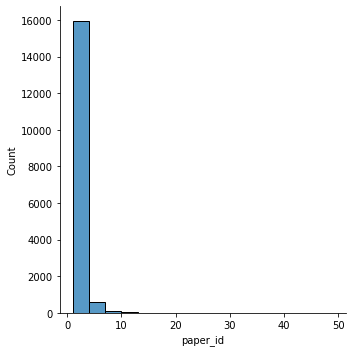

In [205]:
sns.displot(coauthor_df.groupby('author1')['paper_id'].nunique(), kind='hist')

In [218]:
recurring_authors.index

Index(['a b m moniruzzaman', 'a. h. hassan', 'abdul dakkak', 'abdullah gani',
       'abhishek dubey', 'abishek sankararaman', 'achim basermann',
       'adam shimi', 'adel nadjaran toosi', 'alan dearle',
       ...
       'zhi zhou', 'zhibin gao', 'zhiying wang', 'zhu han', 'zhuolun xiang',
       'zibin zheng', 'zohir bouzid', 'zohreh sanaei', 'zoya dyka',
       'ľuboš korenčiak'],
      dtype='object', name='author1', length=773)

In [237]:
recurring_authors = coauthor_df.groupby('author1')['paper_id'].nunique()[coauthor_df.groupby('author1')['paper_id'].nunique() > 5]
filtered_authors = coauthor_df[coauthor_df['author1'].isin(recurring_authors.index)]

In [238]:
import networkx as nx

In [272]:
node_colors = filtered_authors.merge(arxiv_data[['id', 'Topic']], left_on='paper_id', right_on='id').groupby('author1')['Topic'].agg(pd.Series.mode).apply(lambda x: x[0] if isinstance(x, np.ndarray) else x)

In [285]:
node_colors

author1
abdul dakkak           1
alan dearle            5
albert reuther        12
albert y. zomaya       8
alessandro lonardo     5
                      ..
yves robert           10
zheng li               0
zibin zheng            0
zohir bouzid           8
zohreh sanaei          3
Name: Topic, Length: 289, dtype: int64

In [239]:
G_auth = nx.from_pandas_edgelist(filtered_authors, source='author1', target='author2')

In [309]:
import random
colors = []
for _ in range(14):
    r = round(random.random(), 2)
    g = round(random.random(), 2)
    b = round(random.random(), 2)
    a = round(random.random(), 2)
    rgb = [r,g,b,a]
    colors.append(rgb)

In [310]:
color_map = []
for node in G_auth: 
    try:
        color_map.append(colors[node_colors.loc[node]])
    except:
        color_map.append(colors[13])

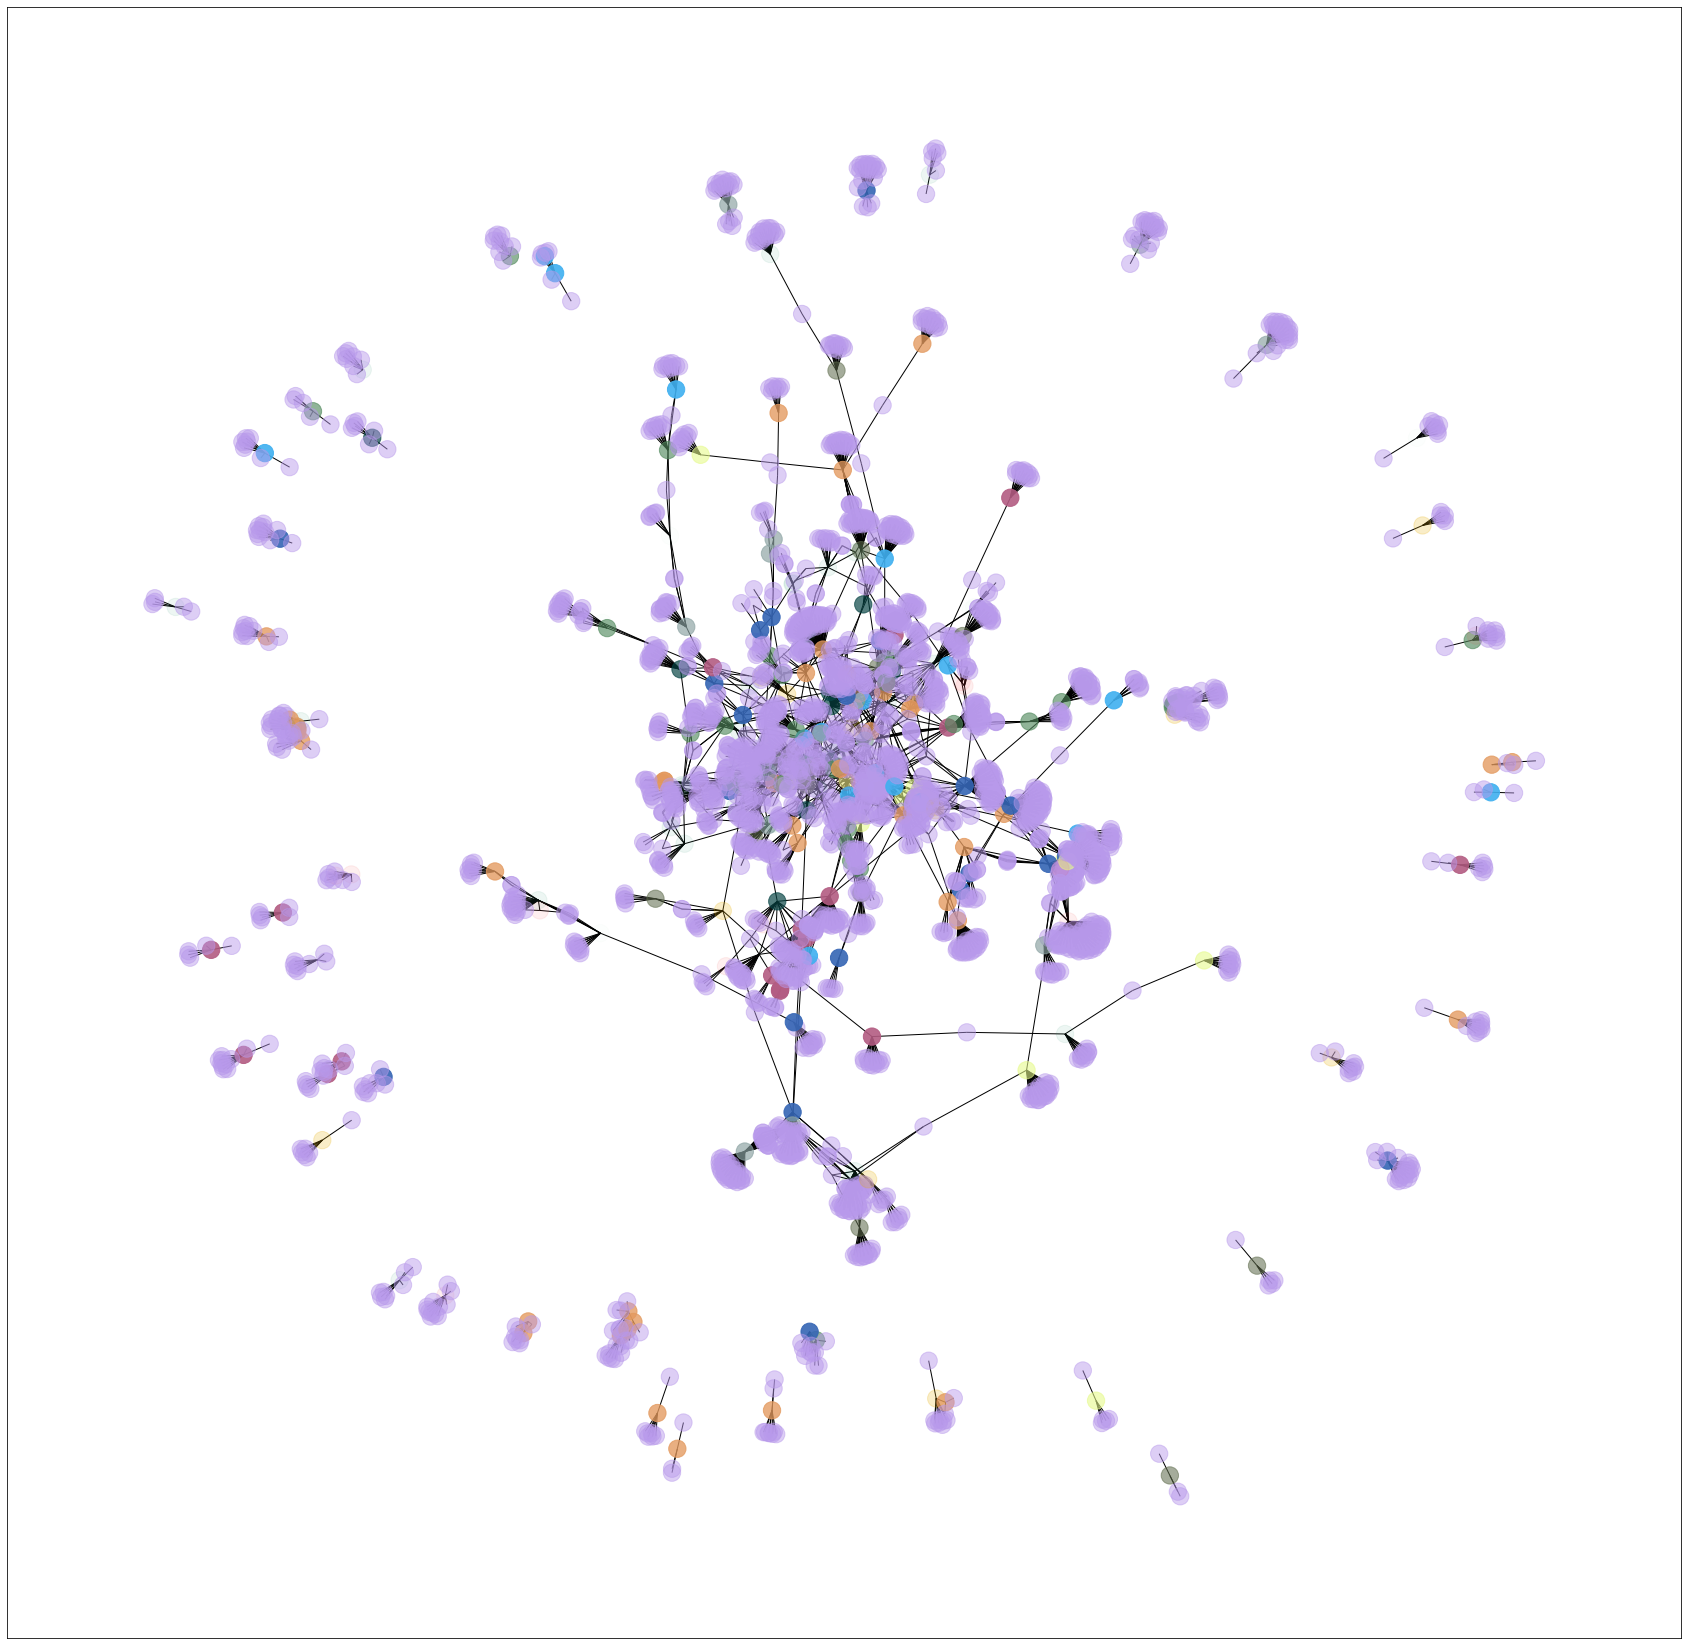

In [311]:
fig = plt.figure(figsize=(30, 30))
nx.draw_networkx(G_auth, with_labels=False, node_color=color_map)

In [312]:
from networkx import degree_centrality

In [337]:
degree_centrality = pd.DataFrame(list(degree_centrality(G_auth).items())).sort_values(by=1, ascending=False)


In [322]:
arxiv_data.groupby([arxiv_data.updated.])

,id,title,categories,abstract,doi,created,updated,authors,Topic,Topic_Prob
0,902.0782,a multiobjective optimization framework for ro...,cs.ni cs.pf,wireless ad hoc networks are seldom characteri...,NaN,2009-02-04,2010-01-06,"['katia jaffrès-runser', 'cristina comaniciu',...",2,0.896714
1,904.4155,fundamentals of the backoff process in 802.11:...,cs.ni cs.pf,this paper discovers fundamental principles of...,NaN,2009-04-27,2010-08-20,"['jeong-woo cho', 'yuming jiang']",10,0.864910
2,1004.1864,the low latency fault tolerance system,cs.dc,the low latency fault tolerance (llft) system ...,NaN,2010-04-11,2010-08-06,"['wenbing zhao', 'p. m. melliar-smith', 'l. e....",2,0.521615
3,1006.49,optimal degree distributions for uniform small...,cs.dc,motivated by kleinberg's (2000) and subsequent...,NaN,2010-06-24,2010-08-03,"['r. seth terashima', 'james d. fix']",2,0.576435
4,1007.1802,practically stabilizing atomic memory,cs.dc cs.ni,a self-stabilizing simulation of a single-writ...,NaN,2010-07-11,2010-07-31,"['noga alon', 'hagit attiya', 'shlomi dolev', ...",12,0.618409
...,...,...,...,...,...,...,...,...,...,...
9149,1408.6328,a generic and extensible framework for monitor...,cs.dc,although cloud computing has been transformati...,NaN,2014-08-27,NaN,"['francois rossigneux', 'jean-patrick gelas', ...",0,0.436740
9150,1408.6347,design and implementation of parallel debugger...,cs.dc cs.se,mpj express is a messaging system that allows ...,NaN,2014-08-27,NaN,"['aleem akhtar', 'aamir shafi', 'mohsan jameel']",10,0.347909
9151,1408.6729,bsp sorting: an experimental study,cs.dc,the bulk-synchronous parallel model of computa...,NaN,2014-08-28,NaN,"['alexandros v. gerbessiotis', 'constantinos j...",7,0.693443
9152,1408.7070,an effective single-hop distributed hash table...,cs.dc,distributed hash tables (dhts) have been used ...,NaN,2014-08-29,NaN,"['luiz monnerat', 'claudio l. amorim']",12,0.530221


In [365]:
arxiv_data.head()

,id,title,categories,abstract,doi,created,updated,authors,date,Topic,Topic_Prob
0,902.0782,a multiobjective optimization framework for ro...,cs.ni cs.pf,wireless ad hoc networks are seldom characteri...,NaN,2009-02-04,2010-01-06,"['katia jaffrès-runser', 'cristina comaniciu',...",2010-01-06,7,0.646839
1,904.4155,fundamentals of the backoff process in 802.11:...,cs.ni cs.pf,this paper discovers fundamental principles of...,NaN,2009-04-27,2010-08-20,"['jeong-woo cho', 'yuming jiang']",2010-08-20,12,0.866226
2,1004.1864,the low latency fault tolerance system,cs.dc,the low latency fault tolerance (llft) system ...,NaN,2010-04-11,2010-08-06,"['wenbing zhao', 'p. m. melliar-smith', 'l. e....",2010-08-06,8,0.482404
3,1006.49,optimal degree distributions for uniform small...,cs.dc,motivated by kleinberg's (2000) and subsequent...,NaN,2010-06-24,2010-08-03,"['r. seth terashima', 'james d. fix']",2010-08-03,11,0.603141
4,1007.1802,practically stabilizing atomic memory,cs.dc cs.ni,a self-stabilizing simulation of a single-writ...,NaN,2010-07-11,2010-07-31,"['noga alon', 'hagit attiya', 'shlomi dolev', ...",2010-07-31,6,0.429847


<AxesSubplot:xlabel='date'>

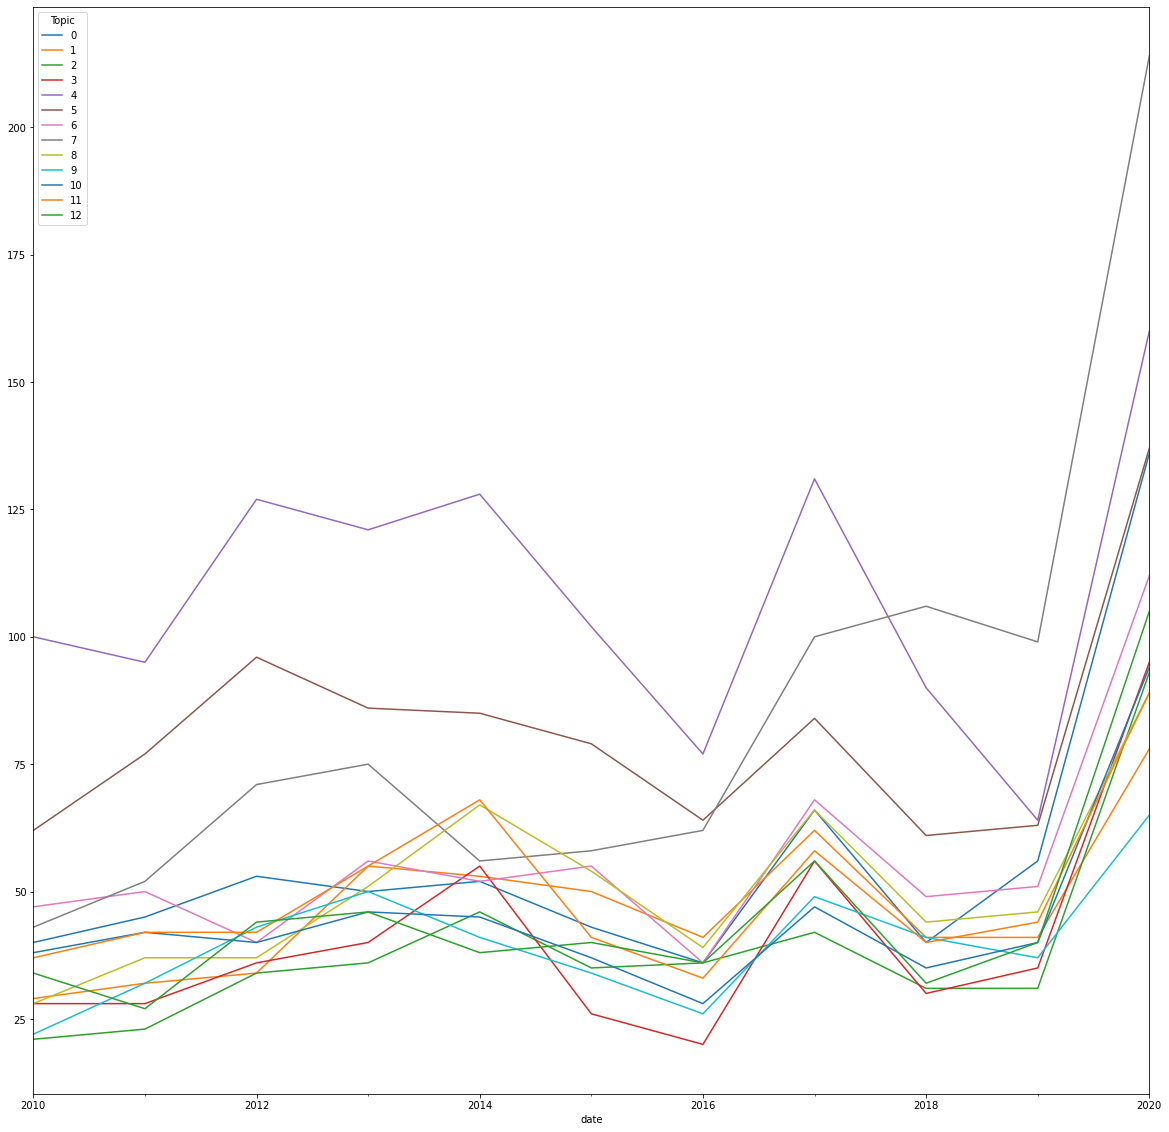

In [391]:
arxiv_data[(arxiv_data['date'] >= '2010-01-01') & (arxiv_data['date'] < '2020-12-31')].pivot_table(columns='Topic', index=arxiv_data.date.dt.to_period("Y"), values='title', aggfunc='count').replace(np.nan, 0).plot(figsize=(20, 20), kind='line')